<a href="https://colab.research.google.com/github/sutharimanikanta/-technity-tasks-/blob/main/proposed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#LOADING DATA

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# provides access to datasets from the UCI Machine Learning Repository.
!pip install ucimlrepo

a total of 30 features of 569 patients were
evaluated. Of all cases, there are 357 benign cases and 212 malignant
ones.

In [ ]:
# fetch the Breast Cancer Wisconsin (Diagnostic) dataset from the UCI
from ucimlrepo import fetch_ucirepo
# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)
# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets
X.head()

radius1  texture1  perimeter1   area1  smoothness1  compactness1  \
0    17.99     10.38      122.80  1001.0      0.11840       0.27760   
1    20.57     17.77      132.90  1326.0      0.08474       0.07864   
2    19.69     21.25      130.00  1203.0      0.10960       0.15990   
3    11.42     20.38       77.58   386.1      0.14250       0.28390   
4    20.29     14.34      135.10  1297.0      0.10030       0.13280   

   concavity1  concave_points1  symmetry1  fractal_dimension1  ...  radius3  \
0      0.3001          0.14710     0.2419             0.07871  ...    25.38   
1      0.0869          0.07017     0.1812             0.05667  ...    24.99   
2      0.1974          0.12790     0.2069             0.05999  ...    23.57   
3      0.2414          0.10520     0.2597             0.09744  ...    14.91   
4      0.1980          0.10430     0.1809             0.05883  ...    22.54   

   texture3  perimeter3   area3  smoothness3  compactness3  concavity3  \
0     17.33      184.60  2019.0       0.1622        0.6656      0.7119   
1     23.41      158.80  1956.0       0.1238        0.1866      0.2416   
2     25.53      152.50  1709.0       0.1444        0.4245      0.4504   
3     26.50       98.87   567.7       0.2098        0.8663      0.6869   
4     16.67      152.20  1575.0       0.1374        0.2050      0.4000   

   concave_points3  symmetry3  fractal_dimension3  
0           0.2654     0.4601             0.11890  
1           0.1860     0.2750             0.08902  
2           0.2430     0.3613             0.08758  
3           0.2575     0.6638             0.17300  
4           0.1625     0.2364             0.07678  

[5 rows x 30 columns]

#ordinal values to numeric

In [ ]:
diagnosis_map = {'M': 1, 'B': 0}
y=y.replace(diagnosis_map)

In [ ]:
#Printing first five rows of data
y.head()
y.nunique()

Diagnosis    2
dtype: int64

In [ ]:
X['Diagnosis']=y

<ipython-input-15-96cd5180cd4b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Diagnosis']=y


In [ ]:
# DataFrame for features ending with '_mean'
mean_columns = ['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1', 'compactness1', 'concavity1','Diagnosis']
group1 = X[mean_columns].copy()
group1.columns = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
                   'smoothness_mean', 'compactness_mean', 'concavity_mean','Diagnosis']

# DataFrame for features ending with '_worst'
worst1_columns =  ['radius3', 'texture3', 'perimeter3', 'area3', 'smoothness3','Diagnosis']
group2 = X[worst1_columns].copy()
group2.columns = ['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
                    'smoothness_worst','Diagnosis']
worst2_columns =  ['compactness3', 'concavity3', 'concave_points3', 'symmetry3', 'fractal_dimension3','Diagnosis']
group3 = X[worst2_columns].copy()
group3.columns = [ 'compactness_worst', 'concavity_worst',
                    'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst','Diagnosis']


In [ ]:
X.head()

radius1  texture1  perimeter1   area1  smoothness1  compactness1  \
0    17.99     10.38      122.80  1001.0      0.11840       0.27760   
1    20.57     17.77      132.90  1326.0      0.08474       0.07864   
2    19.69     21.25      130.00  1203.0      0.10960       0.15990   
3    11.42     20.38       77.58   386.1      0.14250       0.28390   
4    20.29     14.34      135.10  1297.0      0.10030       0.13280   

   concavity1  concave_points1  symmetry1  fractal_dimension1  ...  texture3  \
0      0.3001          0.14710     0.2419             0.07871  ...     17.33   
1      0.0869          0.07017     0.1812             0.05667  ...     23.41   
2      0.1974          0.12790     0.2069             0.05999  ...     25.53   
3      0.2414          0.10520     0.2597             0.09744  ...     26.50   
4      0.1980          0.10430     0.1809             0.05883  ...     16.67   

   perimeter3   area3  smoothness3  compactness3  concavity3  concave_points3  \
0      184.60  2019.0       0.1622        0.6656      0.7119           0.2654   
1      158.80  1956.0       0.1238        0.1866      0.2416           0.1860   
2      152.50  1709.0       0.1444        0.4245      0.4504           0.2430   
3       98.87   567.7       0.2098        0.8663      0.6869           0.2575   
4      152.20  1575.0       0.1374        0.2050      0.4000           0.1625   

   symmetry3  fractal_dimension3  Diagnosis  
0     0.4601             0.11890          1  
1     0.2750             0.08902          1  
2     0.3613             0.08758          1  
3     0.6638             0.17300          1  
4     0.2364             0.07678          1  

[5 rows x 31 columns]

In [ ]:
sns.pairplot(group1,hue='Diagnosis')
plt.show()

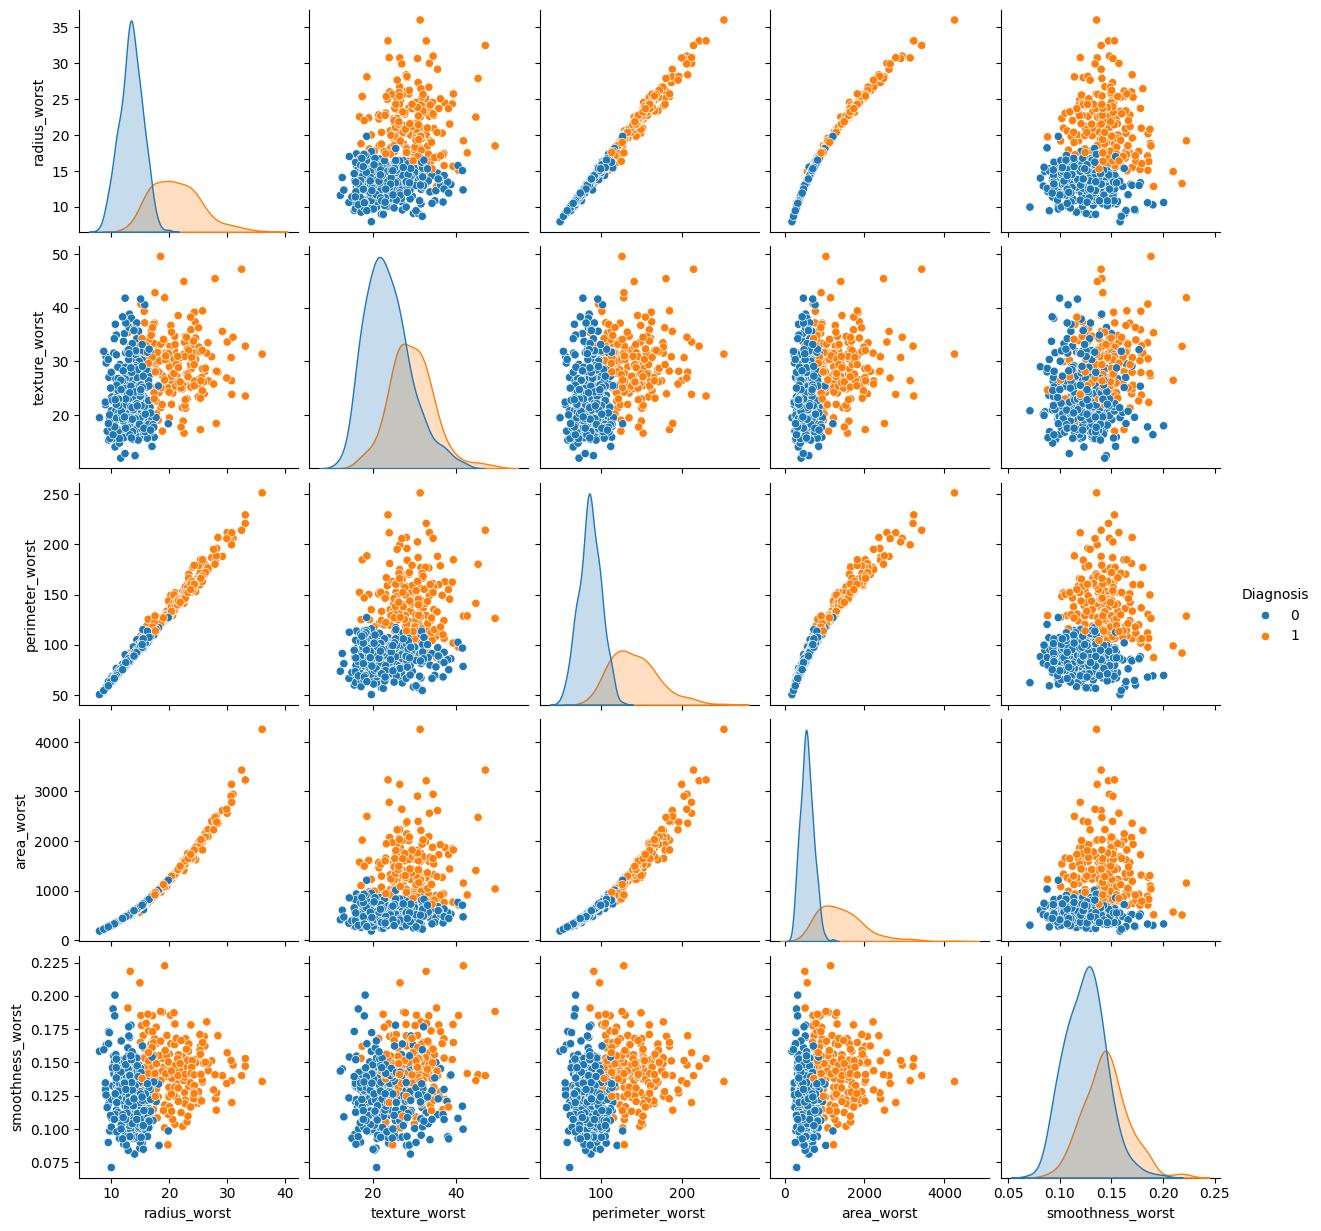

In [ ]:
sns.pairplot(group2,hue='Diagnosis')
plt.show()

In [ ]:
sns.pairplot(group3,hue='Diagnosis')
plt.show()

In [ ]:
# Rename columns
rename_dict = {
    'radius1': 'radius_mean',
    'texture1': 'texture_mean',
    'perimeter1': 'perimeter_mean',
    'area1': 'area_mean',
    'smoothness1': 'smoothness_mean',
    'compactness1': 'compactness_mean',
    'concavity1': 'concavity_mean',
    'concave_points1': 'concave_points_mean',
    'symmetry1': 'symmetry_mean',
    'fractal_dimension1': 'fractal_dimension_mean',
    'radius2': 'radius_se',
    'texture2': 'texture_se',
    'perimeter2': 'perimeter_se',
    'area2': 'area_se',
    'smoothness2': 'smoothness_se',
    'compactness2': 'compactness_se',
    'concavity2': 'concavity_se',
    'concave_points2': 'concave_points_se',
    'symmetry2': 'symmetry_se',
    'fractal_dimension2': 'fractal_dimension_se',
    'radius3': 'radius_worst',
    'texture3': 'texture_worst',
    'perimeter3': 'perimeter_worst',
    'area3': 'area_worst',
    'smoothness3': 'smoothness_worst',
    'compactness3': 'compactness_worst',
    'concavity3': 'concavity_worst',
    'concave_points3': 'concave_points_worst',
    'symmetry3': 'symmetry_worst',
    'fractal_dimension3': 'fractal_dimension_worst',
    'Diagnosis': 'Diagnosis'
}

# Rename columns in each DataFrame
X.rename(columns=rename_dict, inplace=True)


<ipython-input-16-2794cb1f2307>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.rename(columns=rename_dict, inplace=True)


In [ ]:
X

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave_points_mean  symmetry_mean  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     fractal_dimension_mean  ...  texture_worst  perimeter_worst  area_worst  \
0                   0.07871  ...          17.33           184.60      2019.0   
1                   0.05667  ...          23.41           158.80      1956.0   
2                   0.05999  ...          25.53           152.50      1709.0   
3                   0.09744  ...          26.50            98.87       567.7   
4                   0.05883  ...          16.67           152.20      1575.0   
..                      ...  ...            ...              ...         ...   
564                 0.05623  ...          26.40           166.10      2027.0   
565                 0.05533  ...          38.25           155.00      1731.0   
566                 0.05648  ...          34.12           126.70      1124.0   
567                 0.07016  ...          39.42           184.60      1821.0   
568                 0.05884  ...          30.37            59.16       268.6   

     smoothness_worst  compactness_worst  concavity_worst  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     concave_points_worst  symmetry_worst  fractal_dimension_worst  Diagnosis  
0                  0.2654          0.4601                  0.11890          1  
1                  0.1860          0.2750                  0.08902          1  
2                  0.2430          0.3613                  0.08758          1  
3                  0.2575          0.6638                  0.17300          1  
4                  0.1625          0.2364        

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))

# Calculate correlation matrix
corr_matrix = X.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Define annotation font size
annot_font_size = 8

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', annot=True, fmt=".2f", vmin=-1, vmax=1,
            square=True, linewidths=.5, annot_kws={"size": annot_font_size})

plt.title('Correlation Heatmap (Mean Features)')
plt.show()


<Figure size 1500x1000 with 0 Axes>

# HANDLING MISSING VALUES

In [ ]:
X.interpolate()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave_points_mean  symmetry_mean  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     fractal_dimension_mean  ...  texture_worst  perimeter_worst  area_worst  \
0                   0.07871  ...          17.33           184.60      2019.0   
1                   0.05667  ...          23.41           158.80      1956.0   
2                   0.05999  ...          25.53           152.50      1709.0   
3                   0.09744  ...          26.50            98.87       567.7   
4                   0.05883  ...          16.67           152.20      1575.0   
..                      ...  ...            ...              ...         ...   
564                 0.05623  ...          26.40           166.10      2027.0   
565                 0.05533  ...          38.25           155.00      1731.0   
566                 0.05648  ...          34.12           126.70      1124.0   
567                 0.07016  ...          39.42           184.60      1821.0   
568                 0.05884  ...          30.37            59.16       268.6   

     smoothness_worst  compactness_worst  concavity_worst  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     concave_points_worst  symmetry_worst  fractal_dimension_worst  Diagnosis  
0                  0.2654          0.4601                  0.11890          1  
1                  0.1860          0.2750                  0.08902          1  
2                  0.2430          0.3613                  0.08758          1  
3                  0.2575          0.6638                  0.17300          1  
4                  0.1625          0.2364        

In [ ]:
X.isnull().sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
Diagnosis                  0
dtype: int64

In [ ]:
# #Filling missing values in categorical column with the most frequent value
# X.fillna(X.mode().iloc[0],inplace=True)

In [ ]:
# from sklearn.preprocessing import LabelEncoder

# label_encoder = LabelEncoder()
# y = label_encoder.fit_transform(y)


# REMOVING DUPLICATES

In [ ]:
X.drop_duplicates(inplace=True)

<ipython-input-19-99d737f853d7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop_duplicates(inplace=True)


In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# sns.jointplot(x='radius1', y='texture1', data=X, kind='reg')
# plt.suptitle("Radius1 vs Texture1")
# plt.show()


In [ ]:
X

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave_points_mean  symmetry_mean  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     fractal_dimension_mean  ...  texture_worst  perimeter_worst  area_worst  \
0                   0.07871  ...          17.33           184.60      2019.0   
1                   0.05667  ...          23.41           158.80      1956.0   
2                   0.05999  ...          25.53           152.50      1709.0   
3                   0.09744  ...          26.50            98.87       567.7   
4                   0.05883  ...          16.67           152.20      1575.0   
..                      ...  ...            ...              ...         ...   
564                 0.05623  ...          26.40           166.10      2027.0   
565                 0.05533  ...          38.25           155.00      1731.0   
566                 0.05648  ...          34.12           126.70      1124.0   
567                 0.07016  ...          39.42           184.60      1821.0   
568                 0.05884  ...          30.37            59.16       268.6   

     smoothness_worst  compactness_worst  concavity_worst  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     concave_points_worst  symmetry_worst  fractal_dimension_worst  Diagnosis  
0                  0.2654          0.4601                  0.11890          1  
1                  0.1860          0.2750                  0.08902          1  
2                  0.2430          0.3613                  0.08758          1  
3                  0.2575          0.6638                  0.17300          1  
4                  0.1625          0.2364        

In [ ]:
# to know all names of features
features = X.columns.tolist()
# Print the features
print("Features of the dataset:")
print(features)

Features of the dataset:
['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'Diagnosis']


In [ ]:
import numpy as np
import pandas as pd


outliers = set()  # Initialize an empty set to store outlier indices

# Identify outliers
for i in features:
    # Skip non-numeric columns
    if X[i].dtype != 'float64' and X[i].dtype != 'int64':
        continue
    Q1 = np.percentile(X[i], 25, interpolation='midpoint')
    Q3 = np.percentile(X[i], 75, interpolation='midpoint')
    IQR = Q3 - Q1
    # Upper bound of the box plot
    upper_bound = Q3 + 1.5 * IQR
    # Lower bound of the box plot
    lower_bound = Q1 - 1.5 * IQR
    # Find indices of values exceeding upper bound or falling below lower bound
    upper_outliers = np.where(X[i] > upper_bound)[0]
    lower_outliers = np.where(X[i] < lower_bound)[0]
    # Update the set of outlier indices
    outliers.update(upper_outliers)
    outliers.update(lower_outliers)

# Convert the set to a sorted list (optional, for a more organized output)
outliers = sorted(outliers)

# Print the indices of all outliers
print("Indices of all outliers:", outliers)

# Replace outliers with the median value of the column
for i in features:
    if X[i].dtype != 'float64' and X[i].dtype != 'int64':
        continue
    Q1 = np.percentile(X[i], 25, interpolation='midpoint')
    Q3 = np.percentile(X[i], 75, interpolation='midpoint')
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    median = X[i].median()

    X.loc[X[i] > upper_bound, i] = median
    X.loc[X[i] < lower_bound, i] = median


Indices of all outliers: [0, 1, 2, 3, 4, 5, 8, 9, 12, 14, 15, 18, 22, 23, 24, 25, 26, 27, 30, 31, 33, 34, 35, 38, 41, 42, 53, 56, 60, 62, 63, 68, 70, 71, 72, 76, 77, 78, 82, 83, 95, 105, 108, 110, 111, 112, 116, 118, 119, 121, 122, 136, 138, 145, 146, 147, 150, 151, 152, 156, 161, 162, 164, 168, 173, 176, 180, 181, 185, 190, 192, 196, 199, 202, 203, 210, 212, 213, 214, 218, 219, 229, 232, 236, 239, 242, 245, 250, 252, 254, 256, 257, 258, 259, 262, 265, 272, 273, 275, 288, 290, 300, 302, 314, 318, 323, 329, 332, 335, 337, 339, 343, 345, 351, 352, 366, 368, 369, 370, 372, 373, 376, 379, 388, 389, 391, 393, 400, 416, 417, 424, 430, 433, 443, 449, 450, 455, 460, 461, 465, 468, 469, 471, 473, 485, 489, 492, 498, 503, 504, 505, 507, 520, 521, 528, 533, 535, 537, 538, 539, 553, 556, 557, 559, 561, 562, 563, 564, 565, 567, 568]


In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Initialize PCA
pca = PCA(n_components=2)  # Reduce to 2 principal components for visualization
X_pca = pca.fit_transform(X.drop(columns=['Diagnosis']))

# Initialize t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X.drop(columns=['Diagnosis']))

# Visualize the results
plt.figure(figsize=(15, 6))

# Plot PCA visualization
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=X['Diagnosis'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization')
plt.colorbar(label='Target Class')

# Plot t-SNE visualization
plt.subplot(1, 2, 2)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=X['Diagnosis'], cmap='viridis')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization')
plt.colorbar(label='Target Class')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit the scaler to the data and transform the data
scaled_data = scaler.fit_transform(X.drop(columns=['Diagnosis']))

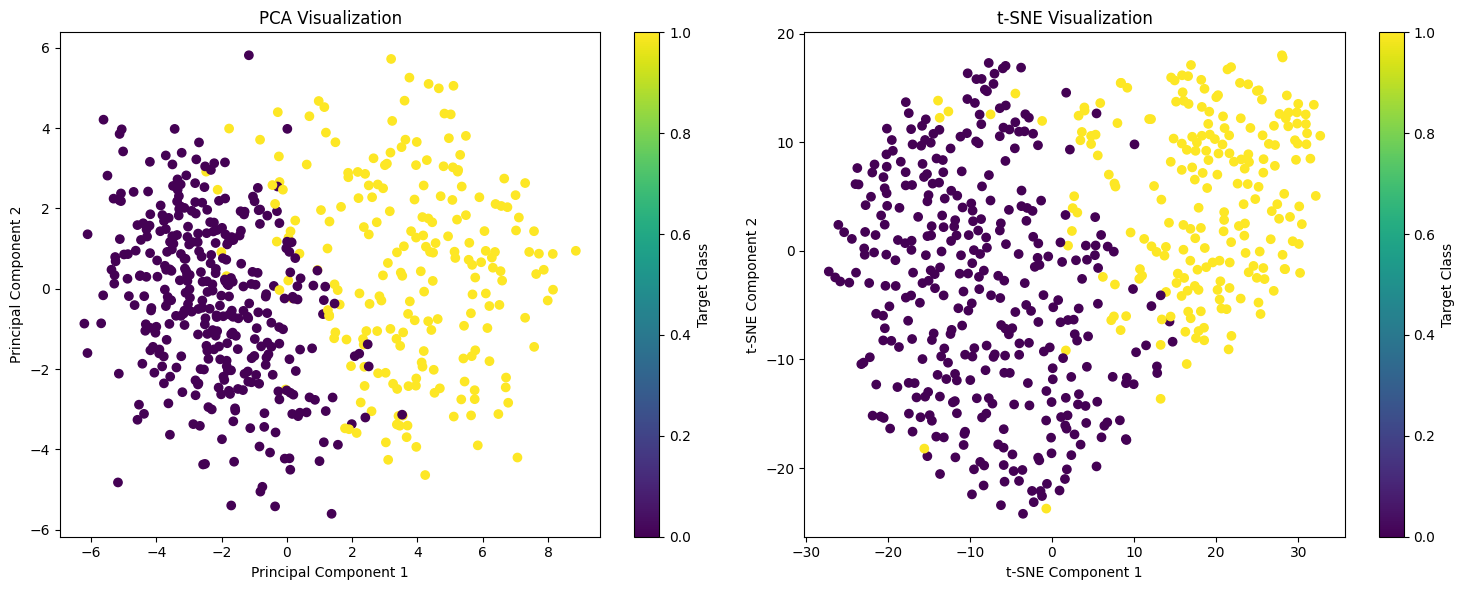

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Initialize PCA
pca = PCA(n_components=2)  # Reduce to 2 principal components for visualization
X_pca = pca.fit_transform(scaled_data)

# Initialize t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(scaled_data)

# Visualize the results
plt.figure(figsize=(15, 6))

# Plot PCA visualization
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=X['Diagnosis'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization')
plt.colorbar(label='Target Class')

# Plot t-SNE visualization
plt.subplot(1, 2, 2)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=X['Diagnosis'], cmap='viridis')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization')
plt.colorbar(label='Target Class')

plt.tight_layout()
plt.show()


In [ ]:
#Printing Shape of data
row_count,col_count = X_tsne.shape
print(f"Number of Rows:{row_count}\nNumber of Columns:{col_count}")

Number of Rows:569
Number of Columns:2


# Generate correlation matrix and printing only values with corr >0.8

In [ ]:
corr_matrix = X.corr()
# Filter the correlation matrix to get features with correlation values greater than 0.8
high_corr_features = corr_matrix[corr_matrix > 0.8]
# Display the filtered correlation mat
high_corr_features

radius_mean  texture_mean  perimeter_mean  area_mean  \
radius_mean                 1.000000           NaN        0.990388   0.925183   
texture_mean                     NaN      1.000000             NaN        NaN   
perimeter_mean              0.990388           NaN        1.000000   0.917086   
area_mean                   0.925183           NaN        0.917086   1.000000   
smoothness_mean                  NaN           NaN             NaN        NaN   
compactness_mean                 NaN           NaN             NaN        NaN   
concavity_mean                   NaN           NaN             NaN        NaN   
concave_points_mean              NaN           NaN             NaN        NaN   
symmetry_mean                    NaN           NaN             NaN        NaN   
fractal_dimension_mean           NaN           NaN             NaN        NaN   
radius_se                        NaN           NaN             NaN        NaN   
texture_se                       NaN           NaN             NaN        NaN   
perimeter_se                     NaN           NaN             NaN        NaN   
area_se                          NaN           NaN             NaN        NaN   
smoothness_se                    NaN           NaN             NaN        NaN   
compactness_se                   NaN           NaN             NaN        NaN   
concavity_se                     NaN           NaN             NaN        NaN   
concave_points_se                NaN           NaN             NaN        NaN   
symmetry_se                      NaN           NaN             NaN        NaN   
fractal_dimension_se             NaN           NaN             NaN        NaN   
radius_worst                0.930719           NaN        0.926143   0.914024   
texture_worst                    NaN      0.889947             NaN        NaN   
perimeter_worst             0.917450           NaN        0.918474   0.903599   
area_worst                  0.852725           NaN        0.849714   0.893200   
smoothness_worst                 NaN           NaN             NaN        NaN   
compactness_worst                NaN           NaN             NaN        NaN   
concavity_worst                  NaN           NaN             NaN        NaN   
concave_points_worst             NaN           NaN             NaN        NaN   
symmetry_worst                   NaN           NaN             NaN        NaN   
fractal_dimension_worst          NaN           NaN             NaN        NaN   
Diagnosis                        NaN           NaN             NaN        NaN   

                         smoothness_mean  compactness_mean  concavity_mean  \
radius_mean                          NaN               NaN             NaN   
texture_mean                         NaN               NaN             NaN   
perimeter_mean                       NaN               NaN             NaN   
area_mean                            NaN               NaN             NaN   
smoothness_mean                      1.0               NaN             NaN   
compactness_mean                     NaN          1.000000        0.807705   
concavity_mean                       NaN          0.807705        1.000000   
concave_points_mean                  NaN               NaN        0.870276   
symmetry_mean                        NaN               NaN             NaN   
fractal_dimension_mean               NaN               NaN             NaN   
radius_se                            NaN               NaN             NaN   
texture_se                           NaN               NaN             NaN   
perimeter_se                         NaN               NaN             NaN   
area_se                              NaN               NaN             NaN   
smoothness_se                        NaN               NaN             NaN   
compactness_se                       NaN               NaN             NaN   
concavity_se                         NaN               NaN             NaN   
concave_points_se           

In [ ]:
# to know all names of features
features = X.columns.tolist()
# Print the features
print("Features of the dataset:")
print(features)

Features of the dataset:
['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'Diagnosis']



Correlation matrices are commonly used in statistics and data analysis to understand the relationships between variables in a dataset. They can help identify patterns, dependencies, and potential multicollinearity issues in the data. Correlation matrices are often visualized as heatmaps for easier interpretation.

# Feature selection


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd

# Impute missing values with the median (second quartile)
imputer = SimpleImputer(strategy='median')
data_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Detect and handle outliers
z_scores = np.abs((data_imputed - data_imputed.mean()) / data_imputed.std())
# Identify outliers (Z-score > 3)
outliers = (z_scores > 3)

# Replace outliers with the median of the respective column
for column in data_imputed.columns:
    median = data_imputed[column].median()
    data_imputed.loc[outliers[column], column] = median

data_no_outliers = data_imputed
X = data_no_outliers.drop(columns=['Diagnosis'])
y = data_no_outliers['Diagnosis']

# Standardize the data
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_features = tsne.fit_transform(data_scaled)

# PCA
pca = PCA(n_components=0.95)  # Retain 95% variance
pca_features = pca.fit_transform(data_scaled)

# Perform Factor Analysis
n_components = 10
fa = FactorAnalysis(n_components=n_components)
fa.fit(data_scaled)
fa_features = fa.transform(data_scaled)

# LDA
lda = LDA(n_components=1)
lda_features = lda.fit_transform(data_scaled, y)

# Combine extracted features
combined_features = np.hstack((pca_features, fa_features, lda_features, tsne_features))

# Evaluate model performance for different percentages of features
percentages = np.arange(0.1, 1.1, 0.1)  # from 10% to 100% in 10% increments
mean_scores = []

for percent in percentages:
    num_features_to_select = int(combined_features.shape[1] * percent)
    model = LogisticRegression()
    rfe = RFE(model, n_features_to_select=num_features_to_select)
    rfe.fit(combined_features, y)
    selected_features = rfe.transform(combined_features)

    # Evaluate the model using cross-validation
    scores = cross_val_score(model, selected_features, y, cv=5)
    mean_scores.append(scores.mean())

# Determine the optimal percentage of features
optimal_index = np.argmax(mean_scores)
optimal_percentage = percentages[optimal_index]
optimal_score = mean_scores[optimal_index]

print(f'Optimal percentage of features: {optimal_percentage * 100:.2f}%')
print(f'Cross-validated score with optimal features: {optimal_score:.4f}')

# Fit RFE with optimal percentage of features
num_features_to_select = int(combined_features.shape[1] * optimal_percentage)
rfe = RFE(model, n_features_to_select=num_features_to_select)
rfe.fit(combined_features, y)
selected_features = rfe.transform(combined_features)

# Create a DataFrame with selected features
selected_data = pd.DataFrame(selected_features)
#selected_data['target'] = y

# Save the selected features DataFrame
selected_data.to_csv('selected_features_data.csv', index=False)


Optimal percentage of features: 10.00%
Cross-validated score with optimal features: 0.9842


In [ ]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(selected_data, y, test_size=0.2, stratify=y, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Split 50% of the train data as unlabeled data for semi-supervised learning
X_labeled, X_unlabeled, y_labeled, y_unlabeled = train_test_split(X_train, y_train, train_size=0.5, stratify=y_train, random_state=42)

# Ensure y_labeled is 1D
y_labeled = y_labeled.ravel()

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=10000),
    'Gaussian Naive Bayes': GaussianNB(),
    'Linear SVM': LinearSVC(max_iter=10000),
    'RBF SVM': SVC(probability=True),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'Gradient Boosting': GradientBoostingClassifier(),
    'KNN': KNeighborsClassifier()
}

# Define hyperparameters grid for each model
param_grids = {
    'Logistic Regression': {'C': [0.1, 1, 10]},
    'Gaussian Naive Bayes': {},  # No hyperparameters for Gaussian Naive Bayes
    'Linear SVM': {'C': [0.1, 1, 10]},
    'RBF SVM': {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto']},
    'Decision Tree': {'max_depth': [None, 5, 10, 20]},
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 5, 10, 20]},
    'XGBoost': {
        'n_estimators': [50, 100],  # Reduced the number of estimators
        'max_depth': [3, 5],
        'learning_rate': [0.1, 0.2],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0],
        'gamma': [0, 0.1]
    },
    'Gradient Boosting': {'n_estimators': [50, 100], 'max_depth': [3, 5]},
    'KNN': {'n_neighbors' : [5,7,9,11,13,15], 'weights' : ['uniform','distance'], 'metric' : ['minkowski','euclidean','manhattan']}
}

# Initialize KFold object
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Function to print metrics
def print_metrics(model_name, y_true, y_pred, context="SL"):
    precision = precision_score(y_true, y_pred, average=None)
    recall = recall_score(y_true, y_pred, average=None)
    f1 = f1_score(y_true, y_pred, average=None)
    accuracy = accuracy_score(y_true, y_pred)
    avg_precision = np.mean(precision)
    avg_recall = np.mean(recall)
    avg_f1 = np.mean(f1)

    print(f"Model: {model_name} ({context})")
    print(f"Malignant Precision: {precision[1] * 100:.2f}% | Recall: {recall[1] * 100:.2f}% | F1-Score: {f1[1] * 100:.2f}%")
    print(f"Benign Precision: {precision[0] * 100:.2f}% | Recall: {recall[0] * 100:.2f}% | F1-Score: {f1[0] * 100:.2f}%")
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Avg Precision: {avg_precision * 100:.2f}% | Avg Recall: {avg_recall * 100:.2f}% | Avg F1-Score: {avg_f1 * 100:.2f}%")
    print("----------------------------------------------")

# Supervised learning (SL)
for model_name, model in models.items():
    param_grid = param_grids[model_name]
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    y_pred = grid_search.best_estimator_.predict(X_test)
    print_metrics(model_name, y_test, y_pred, context="SL")

# Semi-supervised learning (SSL)
for model_name, model in models.items():
    param_grid = param_grids[model_name]  # Retrieve the parameter grid for the current model

    for iteration in range(5):  # Perform 5 iterations
        # Perform grid search CV on the current labeled data
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_labeled, y_labeled)  # Fit the model using labeled data

        # Predict labels for the unlabeled data using the best model
        if len(X_unlabeled) > 0:  # Check if X_unlabeled is not empty
            y_unlabeled_pred = grid_search.best_estimator_.predict(X_unlabeled)
            mask = (y_unlabeled_pred != -1)  # Create a mask for confident predictions

            if mask.sum() == 0:
                break  # No new confident predictions, stop the loop

            # Ensure y_unlabeled_pred[mask] is 1D
            y_unlabeled_pred = y_unlabeled_pred[mask].ravel()

            # Add confidently predicted unlabeled data to the labeled set
            X_labeled = np.concatenate((X_labeled, X_unlabeled[mask]), axis=0)
            y_labeled = np.concatenate((y_labeled, y_unlabeled), axis=0)

            # Remove confidently predicted data from the unlabeled set
            X_unlabeled = X_unlabeled[~mask]
        else:
            break  # X_unlabeled is empty, exit the loop

    # Predict on test data using the final best estimator
    y_pred = grid_search.best_estimator_.predict(X_test)

    # Print metrics
    print_metrics(model_name, y_test, y_pred, context="SSL")


Model: Logistic Regression (SL)
Malignant Precision: 100.00% | Recall: 97.62% | F1-Score: 98.80%
Benign Precision: 98.63% | Recall: 100.00% | F1-Score: 99.31%
Accuracy: 99.12%
Avg Precision: 99.32% | Avg Recall: 98.81% | Avg F1-Score: 99.05%
----------------------------------------------
Model: Gaussian Naive Bayes (SL)
Malignant Precision: 100.00% | Recall: 95.24% | F1-Score: 97.56%
Benign Precision: 97.30% | Recall: 100.00% | F1-Score: 98.63%
Accuracy: 98.25%
Avg Precision: 98.65% | Avg Recall: 97.62% | Avg F1-Score: 98.10%
----------------------------------------------
Model: Linear SVM (SL)
Malignant Precision: 100.00% | Recall: 97.62% | F1-Score: 98.80%
Benign Precision: 98.63% | Recall: 100.00% | F1-Score: 99.31%
Accuracy: 99.12%
Avg Precision: 99.32% | Avg Recall: 98.81% | Avg F1-Score: 99.05%
----------------------------------------------
Model: RBF SVM (SL)
Malignant Precision: 100.00% | Recall: 95.24% | F1-Score: 97.56%
Benign Precision: 97.30% | Recall: 100.00% | F1-Score: 9

# ROC CURVE

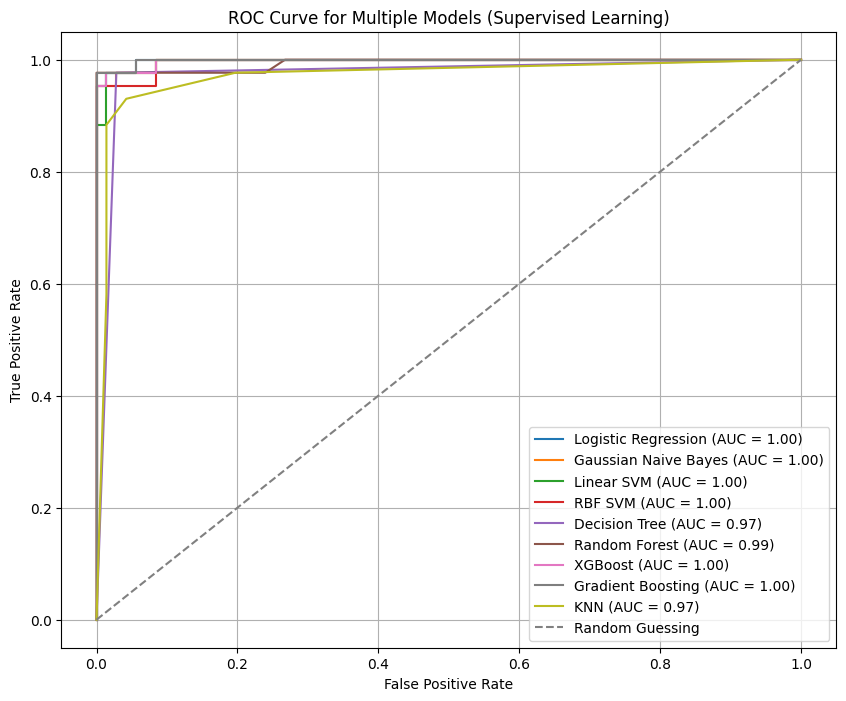

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Function to collect ROC curve data
def get_roc_data(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    if hasattr(model, "predict_proba"):  # Check if the model has predict_proba() method
        proba = model.predict_proba(X_test)[:, 1]  # Probability of positive class
    else:
        proba = model.decision_function(X_test)  # Use decision function for SVMs
    fpr, tpr, _ = roc_curve(y_test, proba)
    roc_auc = auc(fpr, tpr)
    return fpr, tpr, roc_auc

# Plot ROC curve for SL models
plt.figure(figsize=(10, 8))
for model_name, model in models.items():
    fpr, tpr, roc_auc = get_roc_data(model, X_train, y_train, X_test, y_test)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiple Models (Supervised Learning)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Semi-Supervised Learning ROC curve plotting
plt.figure(figsize=(10, 8))
for model_name, model in models.items():
    # Semi-Supervised Learning loop
    param_grid = param_grids[model_name]  # Retrieve the parameter grid for the current model
    X_labeled, X_unlabeled, y_labeled, y_unlabeled = train_test_split(X_train, y_train, train_size=0.5, stratify=y_train, random_state=42)
    y_labeled = y_labeled.ravel()

    for iteration in range(5):  # Perform 5 iterations
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_labeled, y_labeled)

        if len(X_unlabeled) > 0:  # Check if X_unlabeled is not empty
            y_unlabeled_pred = grid_search.best_estimator_.predict(X_unlabeled)
            mask = (y_unlabeled_pred != -1)  # Create a mask for confident predictions

            if mask.sum() == 0:
                break  # No new confident predictions, stop the loop

            y_unlabeled_pred = y_unlabeled_pred[mask].ravel()

            X_labeled = np.concatenate((X_labeled, X_unlabeled[mask]), axis=0)
            y_labeled = np.concatenate((y_labeled, y_unlabeled_pred), axis=0)

            X_unlabeled = X_unlabeled[~mask]
            y_unlabeled = y_unlabeled[~mask]
        else:
            break  # X_unlabeled is empty, exit the loop

    fpr, tpr, roc_auc = get_roc_data(grid_search.best_estimator_, X_train, y_train, X_test, y_test)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiple Models (Semi-Supervised Learning)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
